In [1]:
import json
import urllib.request

In [2]:
url = 'http://api.open-notify.org/astros.json'
response = urllib.request.urlopen(url)
r1 = json.loads(response.read())
print("JSON RESULT Obtained : ")
print(r1)

JSON RESULT Obtained : 
{'message': 'success', 'number': 6, 'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'David Saint-Jacques'}, {'craft': 'ISS', 'name': 'Anne McClain'}, {'craft': 'ISS', 'name': 'Alexey Ovchinin'}, {'craft': 'ISS', 'name': 'Nick Hague'}, {'craft': 'ISS', 'name': 'Christina Koch'}]}


In [3]:
print('People Currently in Space: ', r1['number'])
everyone = r1['people']
for p in everyone:
    print(p['name'])

People Currently in Space:  6
Oleg Kononenko
David Saint-Jacques
Anne McClain
Alexey Ovchinin
Nick Hague
Christina Koch


In [4]:
url2 = 'http://api.open-notify.org/iss-now.json'
response2 = urllib.request.urlopen(url2)
r2 = json.loads(response2.read())
print("JSON RESULT Obtained : ")
print(r2)

JSON RESULT Obtained : 
{'iss_position': {'latitude': '-28.5191', 'longitude': '179.3194'}, 'timestamp': 1553449274, 'message': 'success'}


In [5]:

location = r2['iss_position']
lat1 = location['latitude']
lon1 = location['longitude']
print('Latitude: ', lat1)
print('Longitude: ',lon1)

Latitude:  -28.5191
Longitude:  179.3194


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [7]:
from itertools import chain

def draw_map(m, scale=0.2):
    m.shadedrelief(scale=scale)
    
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

CURRENT POSITIONAL COODRINATES
LATITUDE  -41.2741
LONGITUTUDE  -52.2477
CURRENT POSITION ON THE WORLD MAP


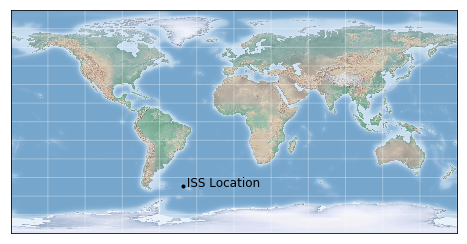

In [25]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)
location = r2['iss_position']
lat1 = location['latitude']
lon1 = location['longitude']
plt.plot(float(lat1), float(lon1), 'ok', markersize=3)
plt.text(float(lat1), float(lon1), ' ISS Location' , fontsize=12);
print("CURRENT POSITIONAL COODRINATES")
print("LATITUDE ", lat1)
print("LONGITUTUDE ", lon1)
print("CURRENT POSITION ON THE WORLD MAP")